In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\n1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA

In [ ]:
ls

sample_data/  test.csv  train.csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
df.Neighborhood.head()

,Neighborhood
0,CollgCr
1,Veenker
2,CollgCr
3,Crawfor
4,NoRidge


In [ ]:
selected_cols = ['LotFrontage', 'LotArea', 'OverallQual',
                 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
                 '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'GarageArea', 'PoolArea']
len(selected_cols)

15

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

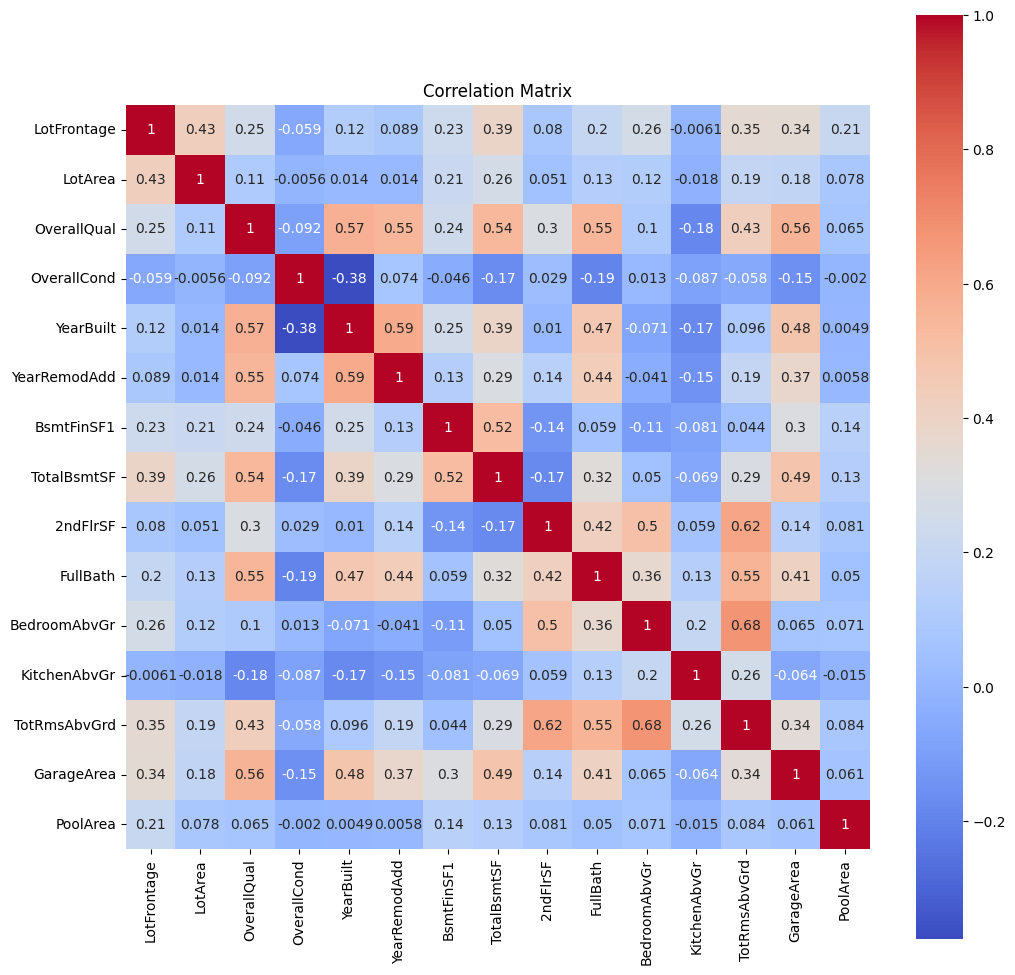

In [ ]:
corr = df[selected_cols].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
train_df = pd.read_csv("train.csv")
features = selected_cols
target = 'SalePrice'
X = train_df[features].values
y = train_df[target].values.reshape(-1, 1)

In [ ]:
def checkNull(features, df):
  # Check if there is null
  # Check feature columns for missing values
  print(df[features].isnull().sum())

In [ ]:
checkNull(features, train_df)

LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
TotalBsmtSF       0
2ndFlrSF          0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
GarageArea        0
PoolArea          0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 15), (292, 15), (1168, 1), (292, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_val = y_scaler.transform(y_val)

In [ ]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
X_train.shape

torch.Size([1168, 15])

In [ ]:
import torch.nn as nn

class HouseModel(nn.Module):
    def __init__(self):
      super(HouseModel, self).__init__()
      self.net = nn.Sequential(
          nn.Linear(X_train.shape[1], 64),
          nn.ReLU(),
          nn.Linear(64, 16),
          nn.ReLU(),
          nn.Linear(16, 1)
      )
    def forward(self, x):
      return self.net(x)

In [ ]:
model = HouseModel()
loss_fnd = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
train_losses = []
val_losses = []

for epoch in range(500):
  model.train()
  pred = model(X_train)
  loss = loss_fnd(pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.no_grad():
    val_pred = model(X_val)
    val_loss = loss_fnd(val_pred, y_val)

  train_losses.append(loss.item())
  val_losses.append(val_loss.item())

  if epoch % 10 == 0:
    print(f'Epoch {epoch:3d}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch   0, Train Loss: 1.0224, Val Loss: 1.2697
Epoch  10, Train Loss: 0.8102, Val Loss: 1.0304
Epoch  20, Train Loss: 0.5973, Val Loss: 0.7778
Epoch  30, Train Loss: 0.3985, Val Loss: 0.5335
Epoch  40, Train Loss: 0.2891, Val Loss: 0.3772
Epoch  50, Train Loss: 0.2379, Val Loss: 0.2895
Epoch  60, Train Loss: 0.2036, Val Loss: 0.2491
Epoch  70, Train Loss: 0.1821, Val Loss: 0.2266
Epoch  80, Train Loss: 0.1677, Val Loss: 0.2129
Epoch  90, Train Loss: 0.1571, Val Loss: 0.2032
Epoch 100, Train Loss: 0.1486, Val Loss: 0.1967
Epoch 110, Train Loss: 0.1417, Val Loss: 0.1924
Epoch 120, Train Loss: 0.1357, Val Loss: 0.1896
Epoch 130, Train Loss: 0.1303, Val Loss: 0.1864
Epoch 140, Train Loss: 0.1254, Val Loss: 0.1836
Epoch 150, Train Loss: 0.1210, Val Loss: 0.1819
Epoch 160, Train Loss: 0.1169, Val Loss: 0.1791
Epoch 170, Train Loss: 0.1131, Val Loss: 0.1768
Epoch 180, Train Loss: 0.1097, Val Loss: 0.1746
Epoch 190, Train Loss: 0.1066, Val Loss: 0.1723
Epoch 200, Train Loss: 0.1037, Val Loss:

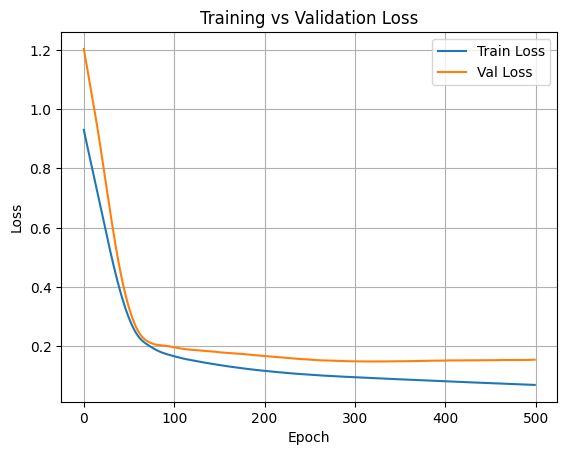

In [ ]:

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_df = pd.read_csv("test.csv")
checkNull(features, test_df)
X_test = test_df[features].values
X_test

LotFrontage     227
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        1
TotalBsmtSF       1
2ndFlrSF          0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
GarageArea        1
PoolArea          0
dtype: int64


array([[8.0000e+01, 1.1622e+04, 5.0000e+00, ..., 5.0000e+00, 7.3000e+02,
        0.0000e+00],
       [8.1000e+01, 1.4267e+04, 6.0000e+00, ..., 6.0000e+00, 3.1200e+02,
        0.0000e+00],
       [7.4000e+01, 1.3830e+04, 5.0000e+00, ..., 6.0000e+00, 4.8200e+02,
        0.0000e+00],
       ...,
       [1.6000e+02, 2.0000e+04, 5.0000e+00, ..., 7.0000e+00, 5.7600e+02,
        0.0000e+00],
       [6.2000e+01, 1.0441e+04, 5.0000e+00, ..., 6.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.4000e+01, 9.6270e+03, 7.0000e+00, ..., 9.0000e+00, 6.5000e+02,
        0.0000e+00]])

In [ ]:
X_test = test_df[features].values
X_test = imputer.transform(X_test)
X_test = scaler.transform(X_test)
X_test = torch.tensor(X_test, dtype=torch.float32)

In [ ]:
X_test.isnan().sum()

tensor(0)

In [ ]:
model.eval()
with torch.no_grad():
  y_pred = model(X_test)
  y_pred = y_scaler.inverse_transform(y_pred).reshape(-1)
  print("NaN count in output:", torch.isnan(model(X_test)).sum())

NaN count in output: tensor(0)


In [ ]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_pred
})
submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>